# Data visualisation


We will be visualizing the collected data in the AI4AR study.

Our data consists of mpMRI images and annotations prepared by three radiologists, as well as clinical information and biopsy results with International Society of Urological Pathology (ISUP) Gleason grading for each lesion. The radiologists annotated the data with multiple imaging features for each lesion, using the assessment algorithm from the PI-RADS standard.

In order to gain a better understanding of the data and to identify any potential trends or patterns, we will be creating a variety of visualizations. These visualizations will include:
- Descriptive statistics: We will use histograms, box plots, and summary statistics to get a sense of the distribution and range of values for each of the variables in the dataset.
- Correlation plots: We will use scatter plots and heatmaps to investigate the relationships between different variables, such as the imaging features and the Gleason grade.
- Data distributions: We will use density plots and violin plots to visualize the distribution of values for each of the variables.
- Data comparisons: We will use bar plots, line plots, and box plots to compare the values of different variables across different groups or categories.

In selecting appropriate data visualization methods, we will consider the type of data (categorical or continuous), the number of variables being plotted, and the intended audience.

Let's begin by importing the necessary libraries and loading the data.

In [1]:
%cd ..

d:\workspace\ai4ar-radiomics


In [4]:
import json

# Load json config file and extension
with open('config/config.json') as json_file:
    config = json.load(json_file)

# Load the extension
with open('config/config-ext.json') as json_file:
    extension = json.load(json_file)
    
    
config = {**config, **extension}

In [8]:
import ai4ar

case = ai4ar.read_case(config['data_dir'], '001')

In [10]:
ai4ar.describe(case)

anatomical_labels/afs (35, 320, 320)
anatomical_labels/cz (35, 320, 320)
anatomical_labels/pg (35, 320, 320)
anatomical_labels/pz (35, 320, 320)
anatomical_labels/sv_l (35, 320, 320)
anatomical_labels/sv_r (35, 320, 320)
anatomical_labels/tz (35, 320, 320)
data/adc (35, 140, 162)
data/cor (36, 320, 320)
data/hbv (35, 140, 162)
data/sag (31, 320, 320)
data/t2w (35, 320, 320)
data/dce1 (88, 224, 312)
data/dce2 (88, 224, 312)
data/dce3 (88, 224, 312)
data/dce4 (88, 224, 312)
data/dce5 (88, 224, 312)
data/dce6 (88, 224, 312)
lesion_labels/lesion1/adc/8ZmM76 (35, 140, 162)
lesion_labels/lesion1/adc/OjmNZ8 (35, 140, 162)
lesion_labels/lesion1/adc/OrjnrO (35, 140, 162)
lesion_labels/lesion1/hbv/8ZmM76 (35, 140, 162)
lesion_labels/lesion1/hbv/OjmNZ8 (35, 140, 162)
lesion_labels/lesion1/hbv/OrjnrO (35, 140, 162)
lesion_labels/lesion1/t2w/8ZmM76 (35, 320, 320)
lesion_labels/lesion1/t2w/OjmNZ8 (35, 320, 320)
lesion_labels/lesion1/t2w/OrjnrO (35, 320, 320)
lesion_labels/lesion1/dce3/OrjnrO (88, 22

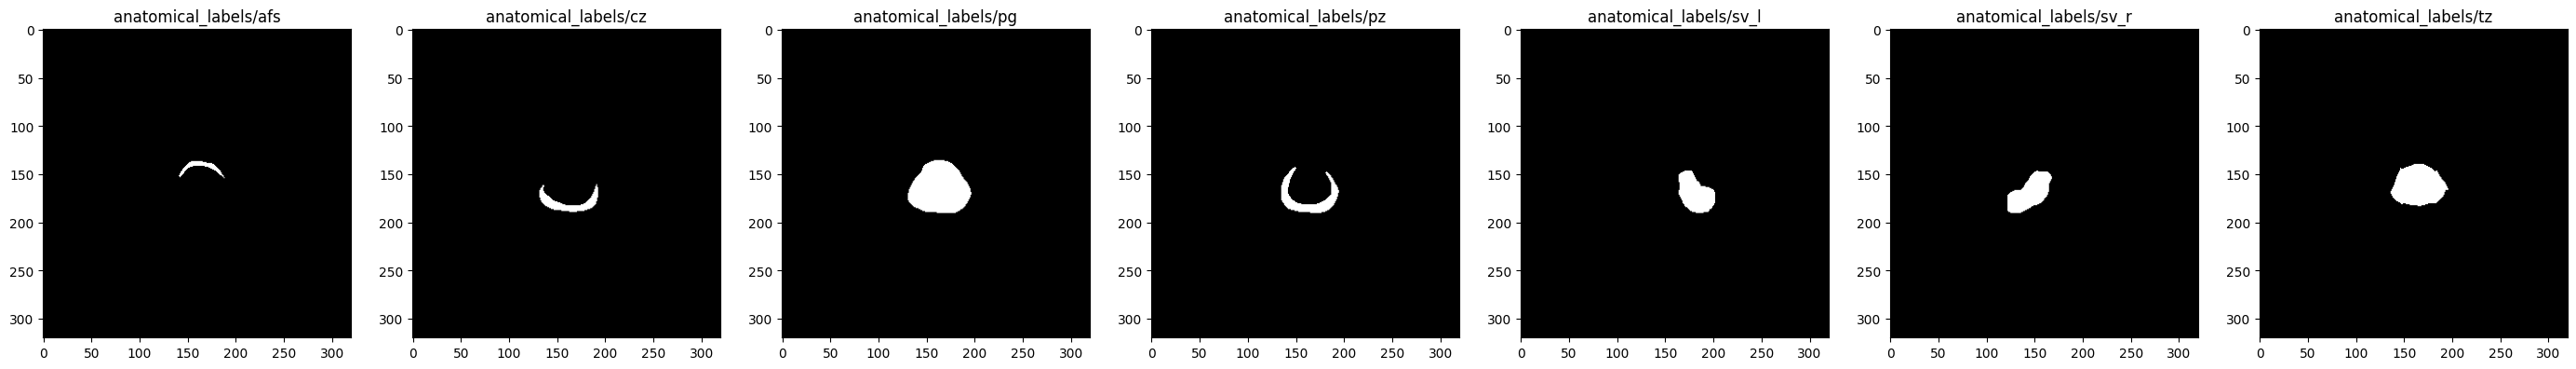

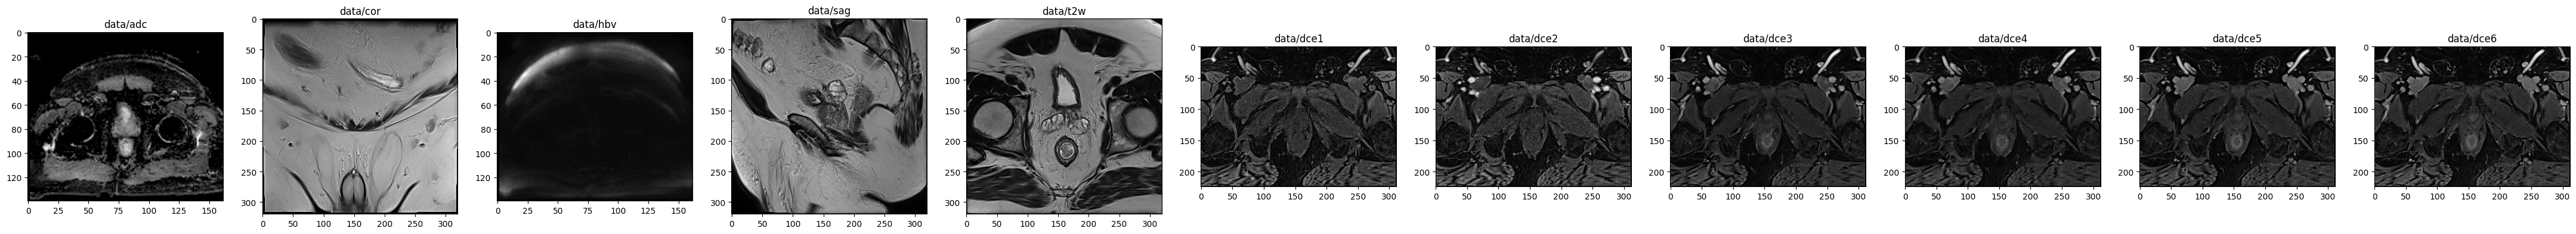

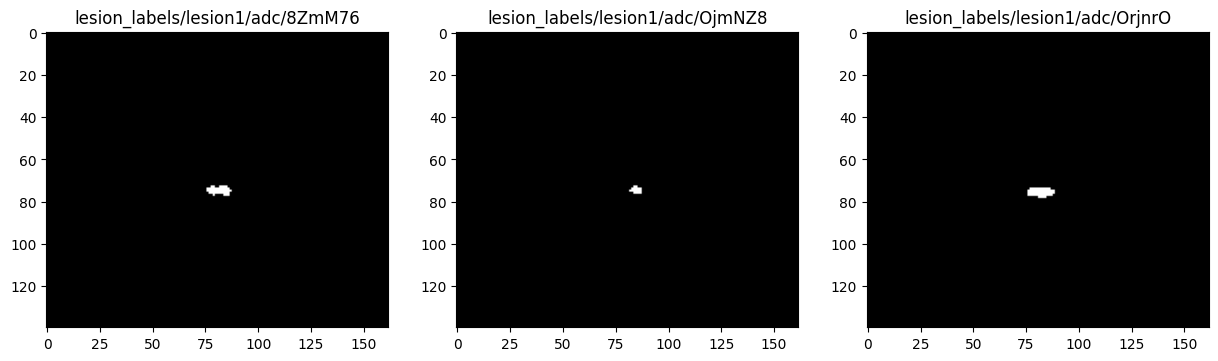

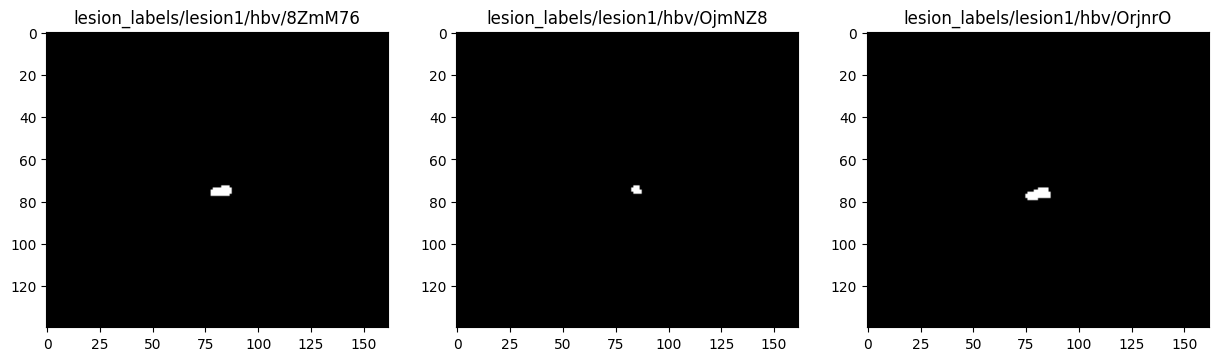

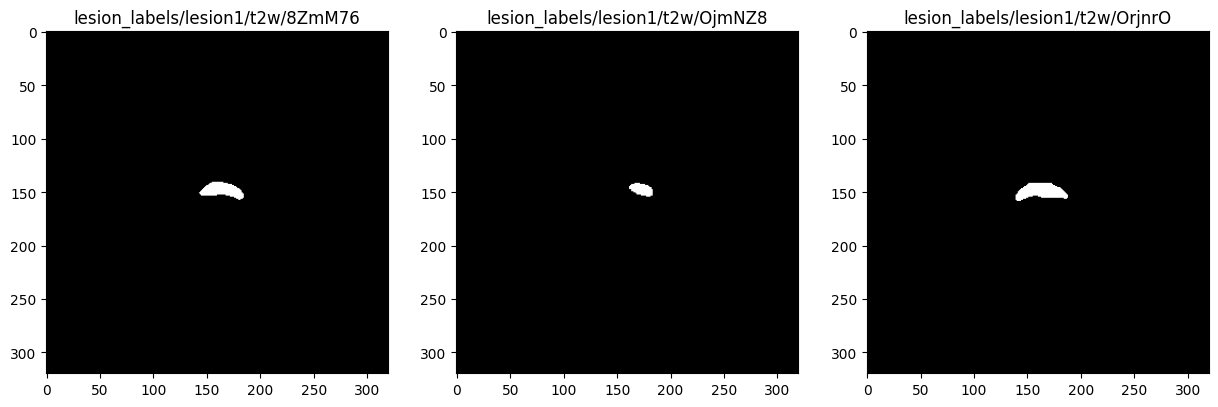

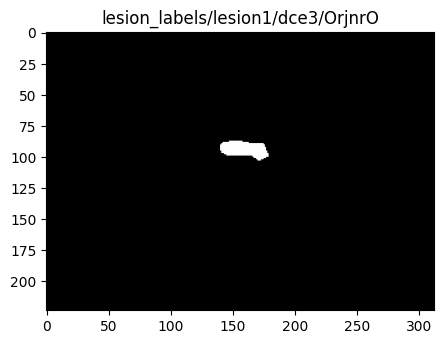

In [11]:
ai4ar.visualize_case(case)